### AELIF

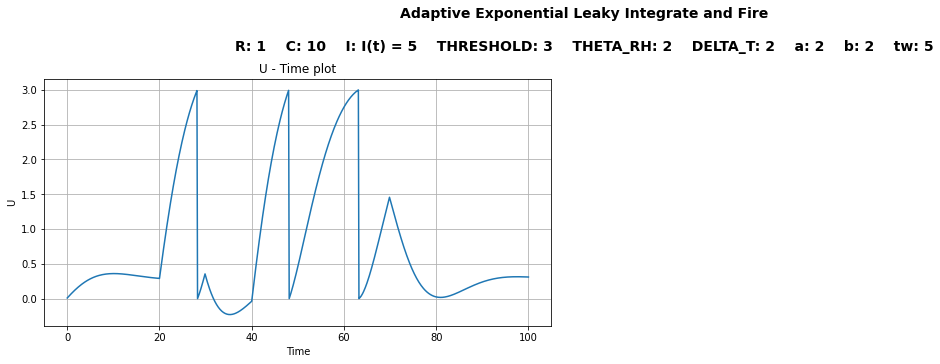

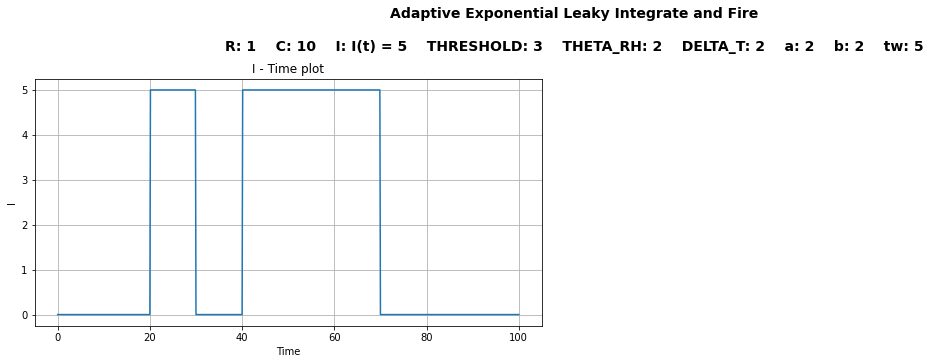

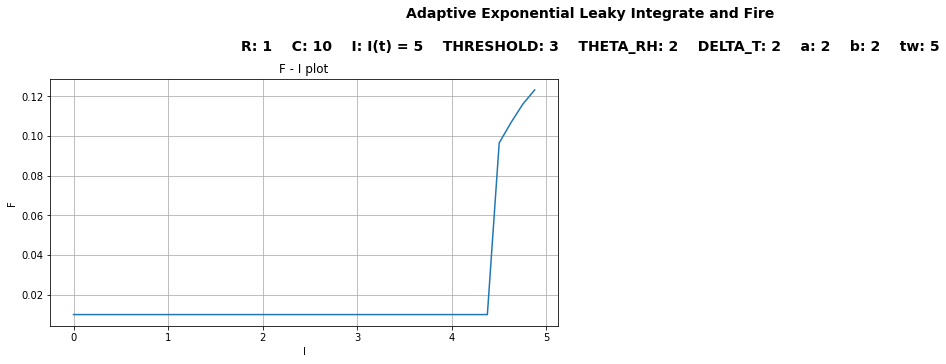

In [1]:
import numpy as np
from matplotlib.pyplot import *
import random
import math

#AELIF
#           ______                   _______
#     /|   |         |          |   |
#    / |   |         |          |   |
#   /  |   |______   |          |   |_______
#  /___|   |         |          |   |
# /    |   |         |          |   |
#/     |   |______   |________  |   |
#






























def show_matplotlyb(sub, x, y, x_label, y_label, title):
    matplotlib.pyplot.subplot(sub)
    matplotlib.pyplot.plot(x, y)
    matplotlib.pyplot.xlabel(x_label)
    matplotlib.pyplot.ylabel(y_label)
    matplotlib.pyplot.title(title)
    matplotlib.pyplot.grid(True)

def i_zero_one(x, i):
    if 20 < x < 70:
        return i
    return 0

def rand_i(x, i):
    return random.random() * i


def current_interval(time, i=5, duration=(20, 80)):
    start, end = duration
    if start < time < end:
        return i
    return 0


def current_linear(time, c=2):
    return c * time


def sine_wave(time, c=10):
    return c * (0.9 + math.sin(time))


def i_constant(time, i=5):
    """I(t) = 5"""
    return i


def current_step(time, i=5, d1=(20, 30), d2=(40, 70)):
    """I(t) = 5"""
    s1, e1 = d1
    s2, e2 = d2
    if s1 < time < e1 or s2 < time < e2:
        return i
    return 0


class AELIF_MODEL:
    def __init__(self, t=100, dt=0.125, i_func=current_interval, u_rest=0,
                 r=1, c=10, threshold=5, delta_t=2,
                 theta_rh=2, a=2, b=2, w_constant=5):
        self.time = t
        self.dt = dt
        self.i_function = i_func
        self.u_rest = u_rest
        self.r = r
        self.c = c
        self.threshold = threshold
        self.delta_t = delta_t
        self.theta_rh = theta_rh
        self.a = a
        self.b = b
        self.w_constant = w_constant
        self.u = []
        self.du()

    def spike_time(self, i):
        timer = np.arange(0, self.time + self.dt, self.dt)
        time_const = self.r * self.c
        U = [self.u_rest for i in range(len(timer))]
        W = [0 for _ in range(len(timer))]
        sigma_delta_function = 0
        i_input = [i_constant(j, i=i) for j in timer]
        spike_t = self.time
        current_spike_time = 0

        for j in range(len(timer)):
            U[j] = U[j - 1] + ((self.r * i_input[j] - (U[j - 1] - self.u_rest) + self.delta_t * math.exp(
                (U[j - 1] - self.theta_rh) / self.delta_t) - self.r * W[j - 1])) * self.dt / time_const
            if U[j] >= self.threshold:
                sigma_delta_function = 1
                U[j] = self.u_rest
                prev_spike_time = current_spike_time
                current_spike_time = timer[j]
                spike_t = min(spike_t, current_spike_time - prev_spike_time)

            W[j] = W[j - 1] + (self.a * (U[j - 1] - self.u_rest)
                               - W[j - 1] + self.b * self.w_constant *
                               sigma_delta_function) * self.dt / self.w_constant
            sigma_delta_function = 0

        return spike_t

    def du(self):
        timer = np.arange(0, self.time + self.dt, self.dt)
        time_const = self.r * self.c
        U = [self.u_rest for i in range(len(timer))]
        W = [0 for _ in range(len(timer))]
        i_input = [self.i_function(j) for j in timer]
        sigma_delta_function = 0

        for j in range(len(timer)):
            U[j] = U[j - 1] + ((self.r * i_input[j] - (U[j - 1] - self.u_rest) + self.delta_t * math.exp(
                (U[j - 1] - self.theta_rh) / self.delta_t) - self.r * W[j - 1])) * self.dt / time_const
            if U[j] >= self.threshold:
                sigma_delta_function = 1
                U[j] = self.u_rest
            W[j] = W[j - 1] + (self.a * (U[j - 1] - self.u_rest)
                               - W[j - 1] + self.b * self.w_constant *
                               sigma_delta_function) * self.dt / self.w_constant
            sigma_delta_function = 0

        self.u = U

    def plt(self, potentional_time=False, current_time=False, frequency_time=False):
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle('Adaptive Exponential Leaky Integrate and Fire\n\n' +
                     "R: " + str(self.r) +
                     "    C: " + str(self.c) +
                     "    I: " + (str(self.i_function.__doc__).strip()) +
                     "    THRESHOLD: " + str(self.threshold) +
                     "    THETA_RH: " + str(self.theta_rh) +
                     "    DELTA_T: " + str(self.delta_t) +
                     "    a: " + str(self.a) +
                     "    b: " + str(self.b) +
                     "    tw: " + str(self.w_constant), fontsize=14, fontweight='bold')

        timer = np.arange(0, self.time + self.dt, self.dt)
        i_input = [self.i_function(j) for j in timer]

        if potentional_time:
            subplot(221)
            plot(timer, self.u)
            ylabel('U')
            xlabel('Time')
            title('U - Time plot')
            grid(True)

        if current_time:
            subplot(221)
            plot(timer, i_input)
            ylabel('I')
            xlabel('Time')
            title('I - Time plot')
            grid(True)

        if frequency_time:
            time_const = self.r * self.c
            i_x = np.arange(0, max(i_input), self.dt)
            i_y = [0 for _ in range(len(i_x))]

            for j in range(len(i_x)):
                try:
                    i_y[j] = 1 / (self.spike_time(i_x[j]))
                except:
                    i_y[j] = 0
            subplot(221)
            plot(i_x, i_y)
            ylabel('F')
            xlabel('I')
            title('F - I plot')
            grid(True)



aelif = AELIF_MODEL(i_func=current_step, threshold=3)
aelif.plt(potentional_time=True)
aelif.plt(current_time=True)
aelif.plt(frequency_time=True)

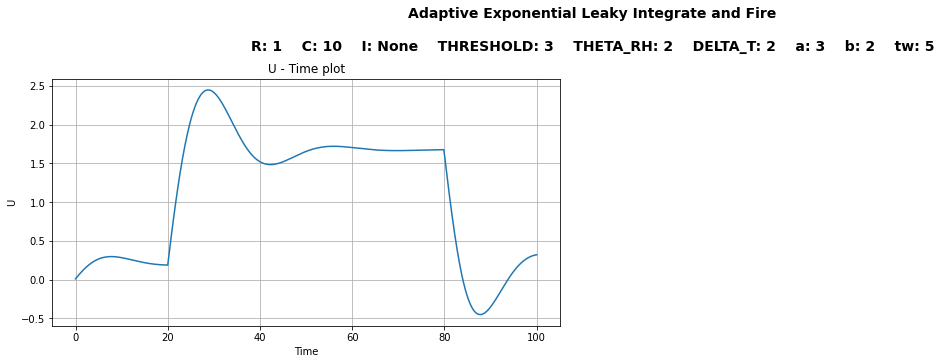

In [2]:
aelif = AELIF_MODEL(threshold=3, a=3)
aelif.plt(potentional_time=True)

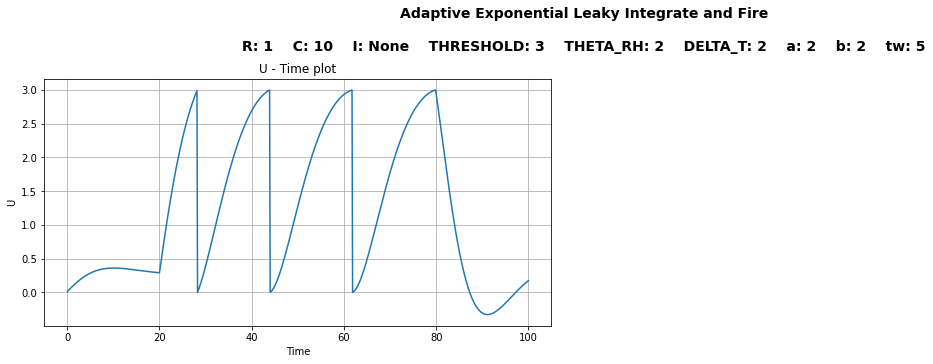

In [3]:
aelif = AELIF_MODEL(threshold=3, a=2)
aelif.plt(potentional_time=True)

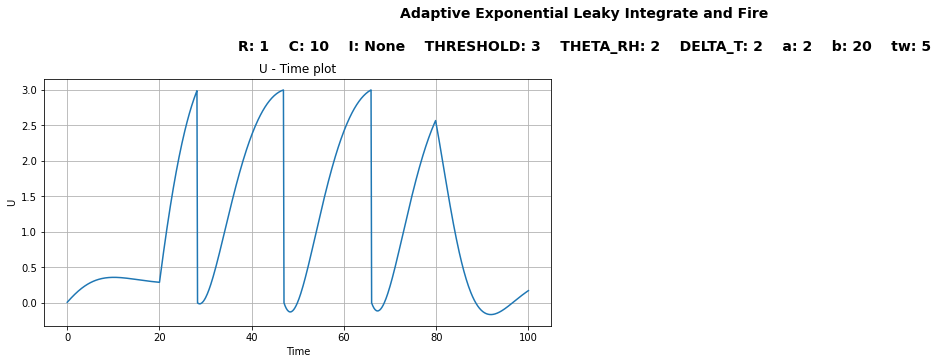

In [4]:
aelif = AELIF_MODEL(threshold=3, b=20)
aelif.plt(potentional_time=True)

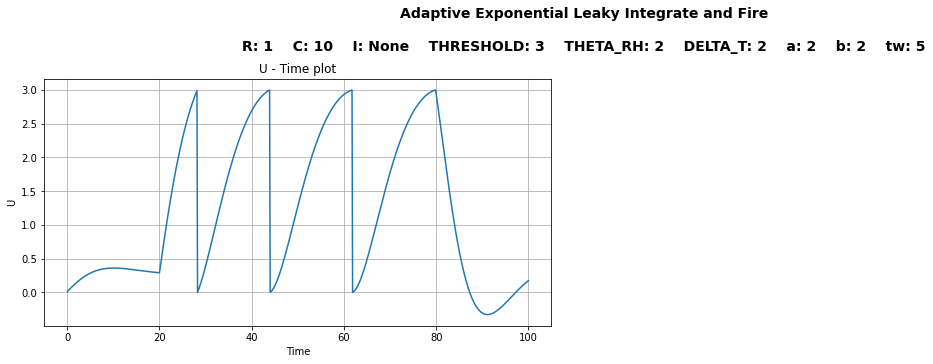

In [5]:
aelif = AELIF_MODEL(threshold=3, b=2)
aelif.plt(potentional_time=True)

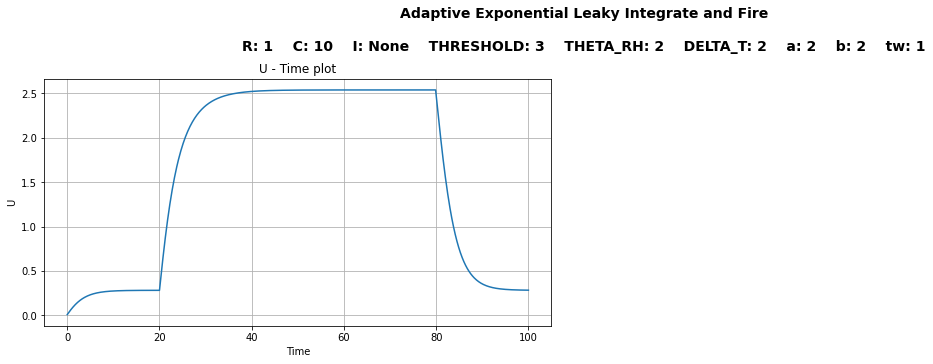

In [6]:
aelif = AELIF_MODEL(threshold=3, w_constant=1)
aelif.plt(potentional_time=True)

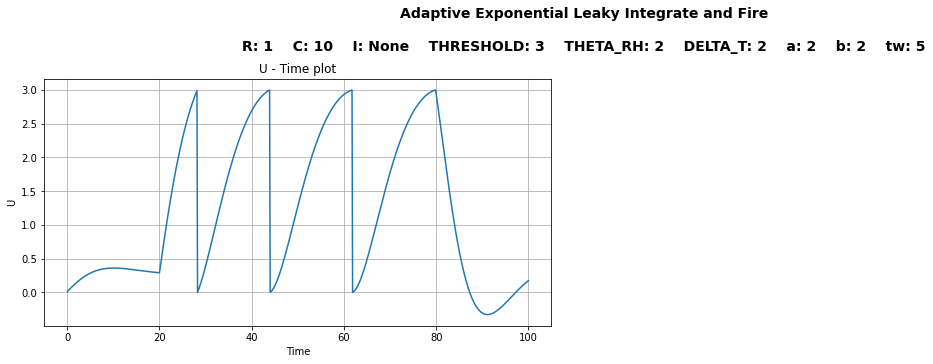

In [7]:
aelif = AELIF_MODEL(threshold=3, w_constant=5)
aelif.plt(potentional_time=True)

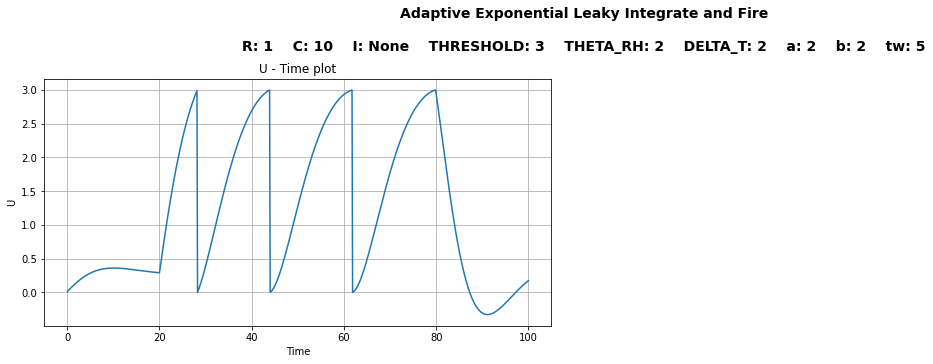

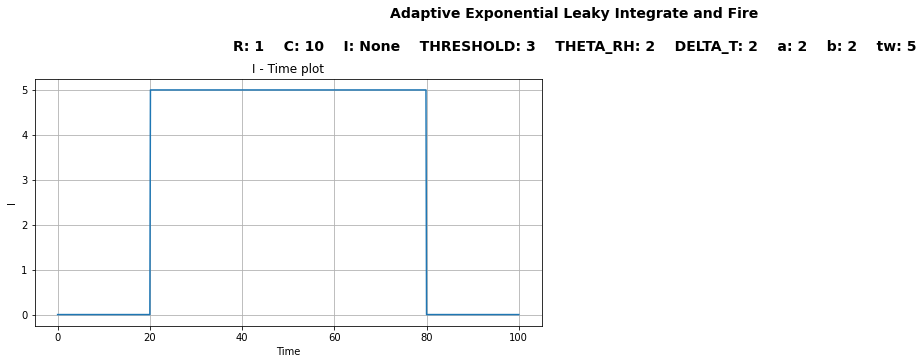

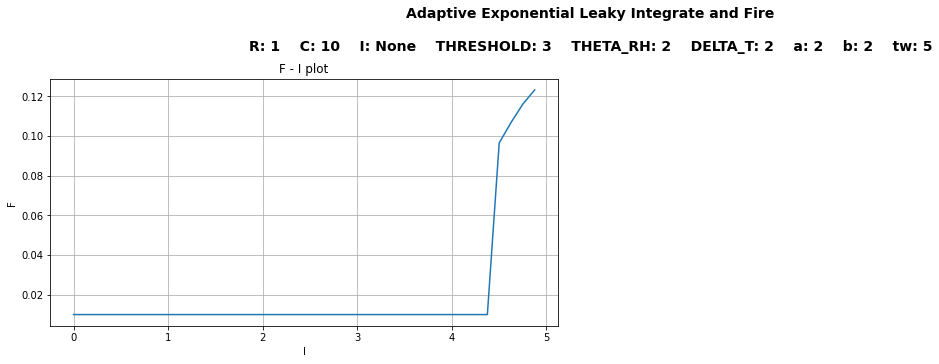

In [8]:
aelif = AELIF_MODEL(threshold=3, i_func=current_interval)
aelif.plt(potentional_time=True)
aelif.plt(current_time=True)
aelif.plt(frequency_time=True)

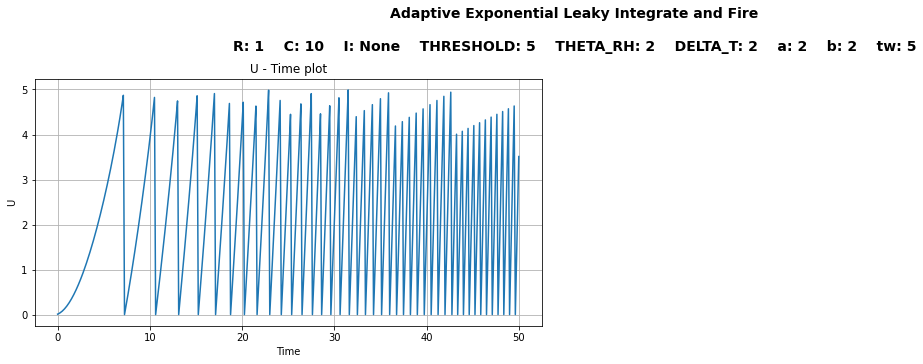

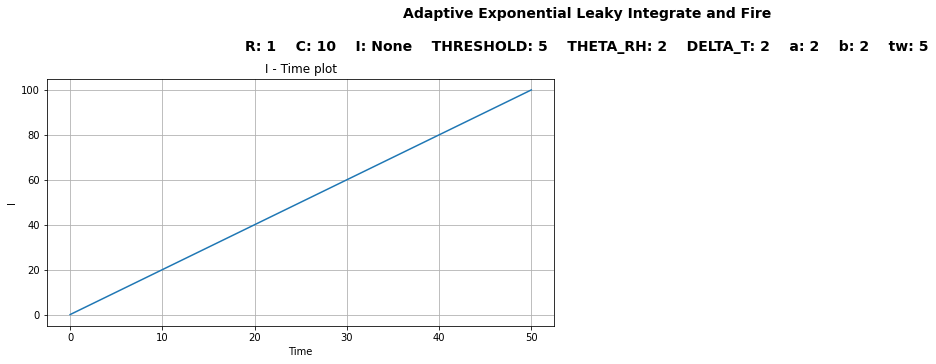

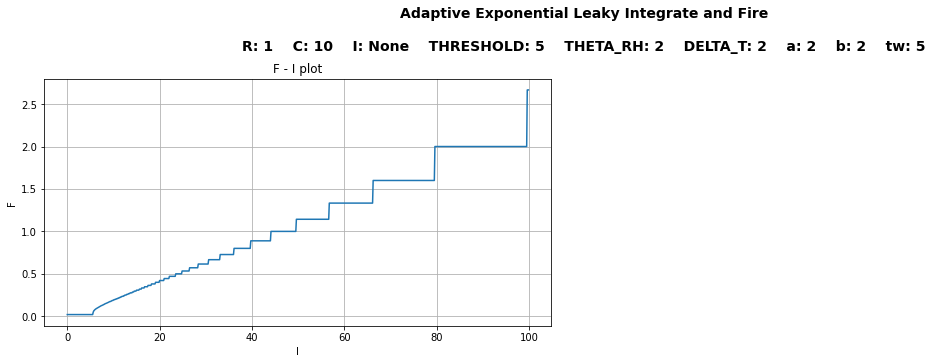

In [9]:
aelif = AELIF_MODEL(threshold=5, i_func=current_linear, t=50)
aelif.plt(potentional_time=True)
aelif.plt(current_time=True)
aelif.plt(frequency_time=True)

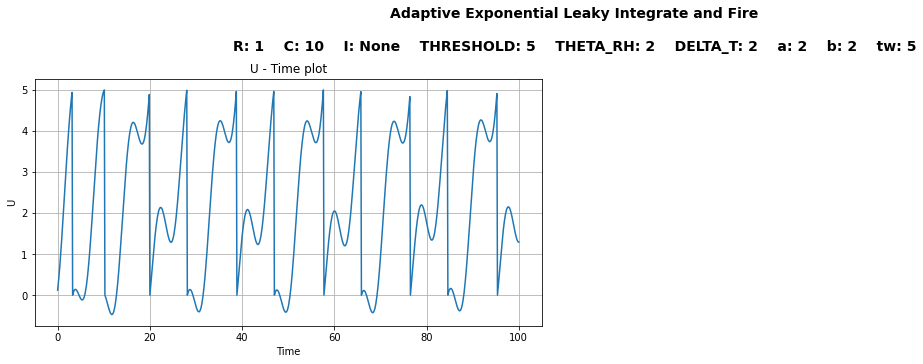

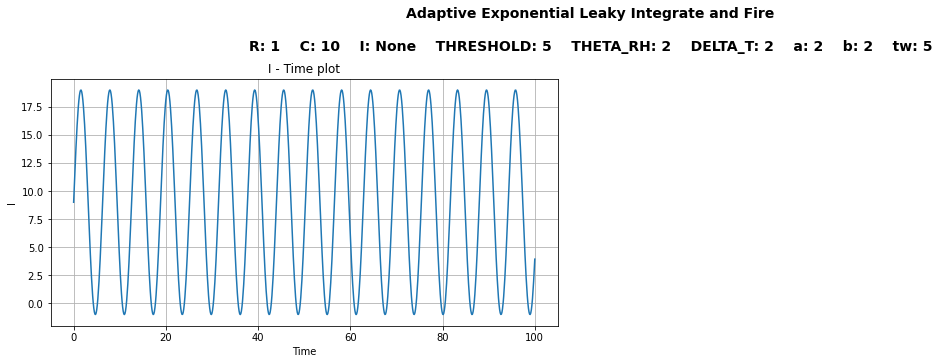

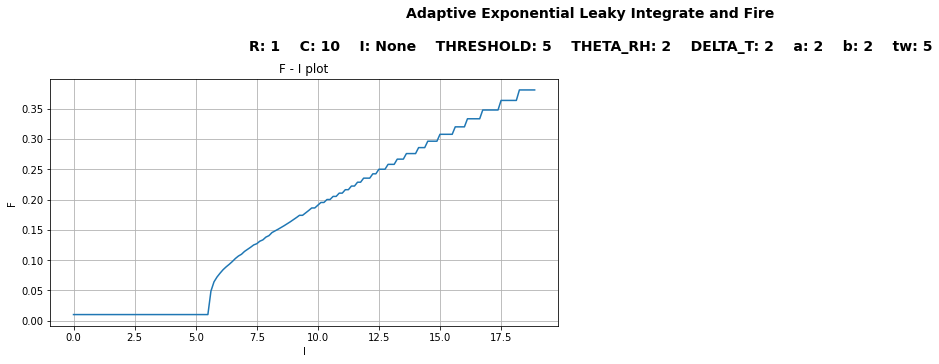

In [10]:
aelif = AELIF_MODEL(i_func=sine_wave)
aelif.plt(potentional_time=True)
aelif.plt(current_time=True)
aelif.plt(frequency_time=True)

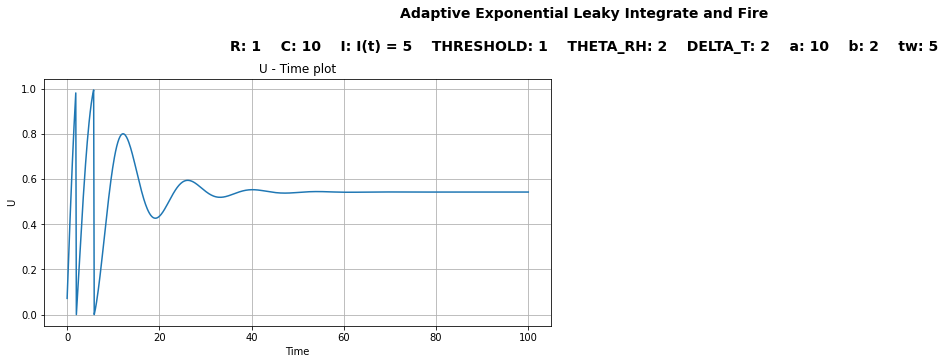

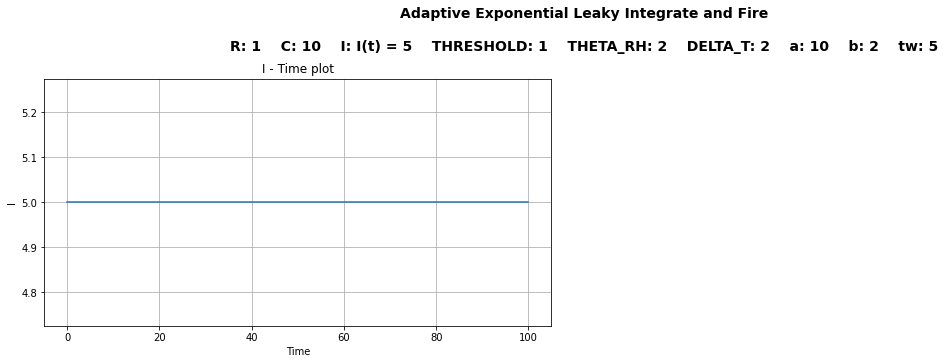

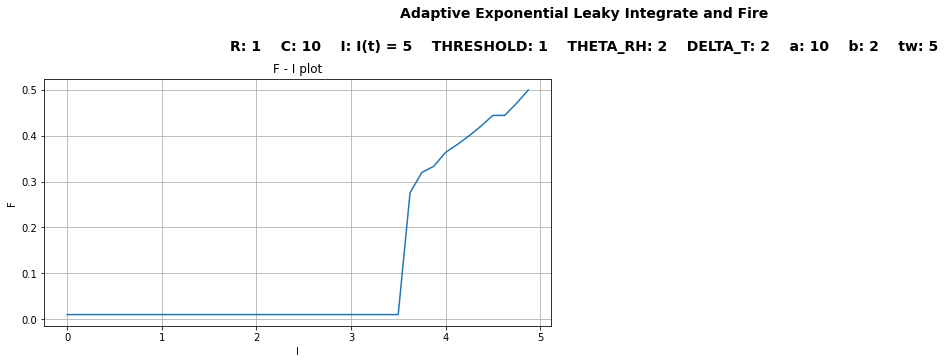

In [11]:
aelif = AELIF_MODEL(i_func=i_constant, t=100, a=10, threshold=1)
aelif.plt(potentional_time=True)
aelif.plt(current_time=True)
aelif.plt(frequency_time=True)

### Hasan Roknabady 99222042